## Desicion Tree

In [40]:
from collections import Counter

In [41]:
from icecream import ic

In [42]:
import numpy as np

In [43]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
#     ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [44]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [45]:
import pandas as pd

In [46]:
dataset = pd.DataFrame.from_dict(mock_data)

In [47]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [48]:
def find_the_optimal_spliter(training_data: pd.DataFrame, target: str):
    if not training_data.empty:
        x_fileds = set(training_data.columns.tolist()) - {target}
        spliter = None
        min_entropy = float('inf')
        for f in x_fileds:
            ic(f)
            values = set(training_data[f])
            ic(values)
            for v in values:

                sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
                ic(sub_spliter_1)
                entropy_1 = entropy(sub_spliter_1)
                ic(entropy_1)

                sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
                ic(sub_spliter_2)
                entropy_2 = entropy(sub_spliter_2)
                ic(entropy_2)

                entropy_v = entropy_1 + entropy_2
                ic(entropy_v)

                if entropy_v <= min_entropy:
                    min_entropy = entropy_v
                    spliter = (f, v)

        print('spliter is: {}'.format(spliter))
        print('the min entropy is: {}'.format(min_entropy))
#     else:
#         return
    return spliter

In [49]:
def find_all_optimal_spliter(training_data: pd.DataFrame, target: str, n):
    Decision_Tree ={}
    data = training_data 
    print('初始训练集')
    #print(data)
    for i in range(n):
        #开始第1次 到 第n-1次切分
        spliter = find_the_optimal_spliter(data, target) 
        Decision_Tree[spliter[0]] = [spliter[0],spliter[1]]        
        print('第{}次spliter'.format(i+1),spliter)
        data = data[data[spliter[0]] != spliter[1]]
        del data[spliter[0]]  #data 更新为 删掉第一层，切分后的数据组
        if data.empty :
            print('finish')
            break
        print("第{}次切分".format(i+1)) 
        if i == n-1:
            print('finish') 
    return Decision_Tree

In [50]:
find_all_optimal_spliter(training_data=dataset, target='bought', n=3)

ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565


初始训练集


ic| entropy_v: 0.6730116670092565
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| f: '

spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565
第1次spliter ('income', '+10')
第1次切分


ic| values: {'F', 'M'}
ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: []
ic| entropy_2: 0
ic| entropy_v: 0.0


spliter is: ('gender', 'M')
the min entropy is: -0.0
第2次spliter ('gender', 'M')
第2次切分
spliter is: ('family_number', 1)
the min entropy is: 0.0
第3次spliter ('family_number', 1)
finish


{'income': ['income', '+10'],
 'gender': ['gender', 'M'],
 'family_number': ['family_number', 1]}

In [51]:
#构建模型
def predicate(training_data: pd.DataFrame, target: str, n, test_data):        
    Decision_Tree = find_all_optimal_spliter(training_data, target, n)    
    for dict_key ,dict_value in Decision_Tree.items():
    #print( dict_input1[str(dict_key)][0])
        if test_data[str(dict_key)][0] == dict_value[0]:
            print('得到预测结果是{}'.format( dict_value[1]))        
            break
    
    

In [52]:
predicate(training_data=dataset, target='bought', n=3,test_data = {
    'gender':['F'],
    'income': ['+10'], 
    'family_number': ['1']})

ic| f: 'family_number'
ic| values: {1, 2}


初始训练集


ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.19884931291362

spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565
第1次spliter ('income', '+10')
第1次切分


ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: []
ic| entropy_2: 0
ic| entropy_v: 0.0


spliter is: ('gender', 'M')
the min entropy is: -0.0
第2次spliter ('gender', 'M')
第2次切分
spliter is: ('family_number', 1)
the min entropy is: 0.0
第3次spliter ('family_number', 1)
finish


## Linear Regression

In [53]:
import numpy as np

In [54]:
random_data = np.random.random((30,2))

In [55]:
import matplotlib.pyplot as plt

In [56]:
X = random_data[:, 0]

In [57]:
y = random_data[:, 1]

In [58]:
import random

In [59]:
def assmuing_function(x):
    return 13.4 * x + 5 + random.randint(-5, 5)

In [60]:
y = [assmuing_function(x) for x in X]

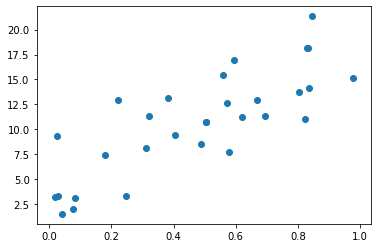

In [61]:
plt.scatter(X, y)

In [62]:
y = np.array(y)

In [63]:
import numpy as np

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
reg =  LinearRegression().fit(X.reshape(-1, 1), y)

In [66]:
reg.score(X.reshape(-1, 1), y)

0.6518649662055518

In [67]:
reg.coef_

array([14.00616099])

In [68]:
reg.intercept_

4.049230216257075

In [69]:
def f(x):
    return reg.coef_ * x + reg.intercept_

In [70]:
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [71]:
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += np.sign(y_i-y_hat_i) * x_i
    return 1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += np.sign(y_i-y_hat_i)
    return 1/n * gradient

In [72]:
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 2000 
losses = []
for i in range(iteration_num):
    
    y_hat = f(X)  # \hat{y}
    
    current_loss = loss(y, y_hat)
    losses.append(current_loss)
#     print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X, y, y_hat)
    b_gradient = partial_derivative_b(y, y_hat)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

In [73]:
best_k

-56.007617351531415

In [74]:
best_b

73.12642327872504

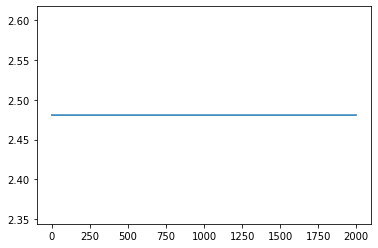

In [75]:
plt.plot(list(range(iteration_num)),losses)